The objective of this project is to predict whether a client will subscribe to a term deposit (indicated by the variable "y" as "yes" or "no"). Your task is to build a predictive model that determines the likelihood of a client subscribing to a term deposit based on the features provided in the dataset.

1. Conduct Exploratory Data Analysis (EDA)

Identify patterns, correlations, and any necessary data preprocessing steps, such as handling missing values, outliers, and data normalization.

2. Feature Engineering

Evaluate which features might be most relevant to predicting client subscription and consider creating new features if applicable.

3. Build a Predictive Model

Use a machine learning algorithm of choice to build a model predicting the subscription outcome.

4. Evaluate Model Performance

Use appropriate metrics such as accuracy, precision, recall, and F1 score to assess model effectiveness. Consider any imbalanced classes and adjust accordingly, possibly using techniques like oversampling, undersampling, or adjusting the class weights.

5. Explain the Findings and Insights

Summarize key findings from the EDA and insights from the model, such as which features were most impactful, common characteristics of clients likely to subscribe, and actionable recommendations for the marketing team.

In [3]:
#Importing the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [4]:
#Importing the data
df = pd.read_csv(r"C:\Users\WIN 10 PRO\Desktop\data\bank-additional-full.csv", sep=';')
#Display a porting of the data
df.head()
#Display a summay of the DataFrame's structure
df.info()
#Display a summary of the distribution, outliers and others about the data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Replace dots with underscores in column names
df.columns = df.columns.str.replace('.', '_', regex=False)

# Check the new column names
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


<Axes: xlabel='y', ylabel='count'>

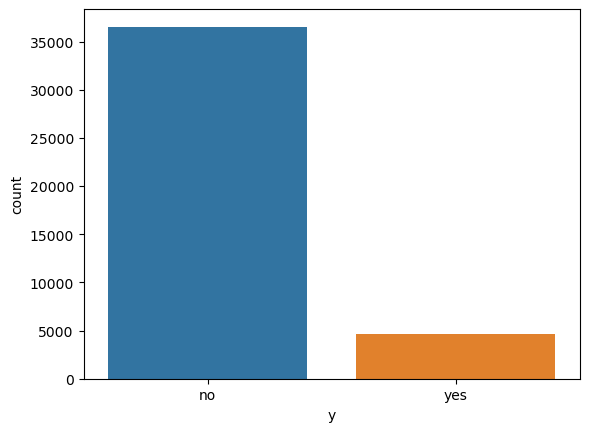

In [6]:
# Checking class imbalance
df['y'].value_counts(normalize=True)  
#Visualising the proportion of the responses
sns.countplot(x='y', data=df)

Majority of the responses concerning subscribing to a term deposit were negative

In [7]:
#Checking of the were some missing values in the dataset
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

None of the columns had missing values

In [8]:
#Selecting all numeric features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

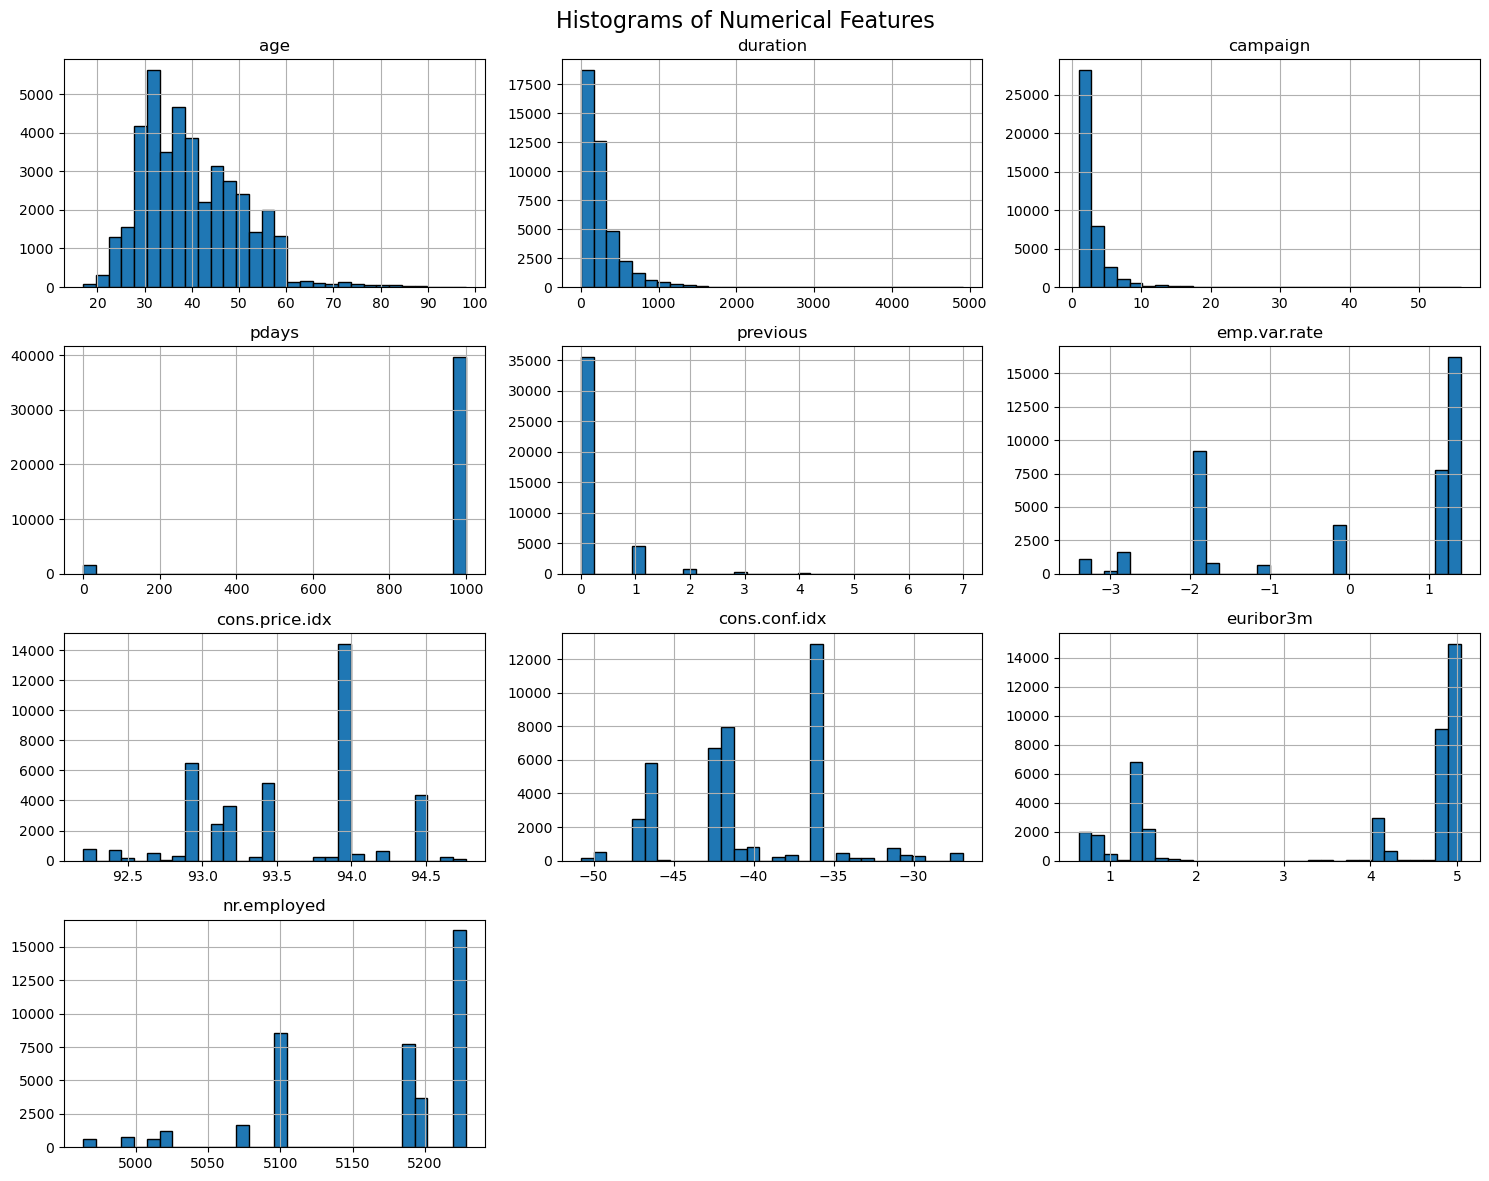

In [5]:
#Visualising the distribution of the numerical_features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
df[numerical_features].hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

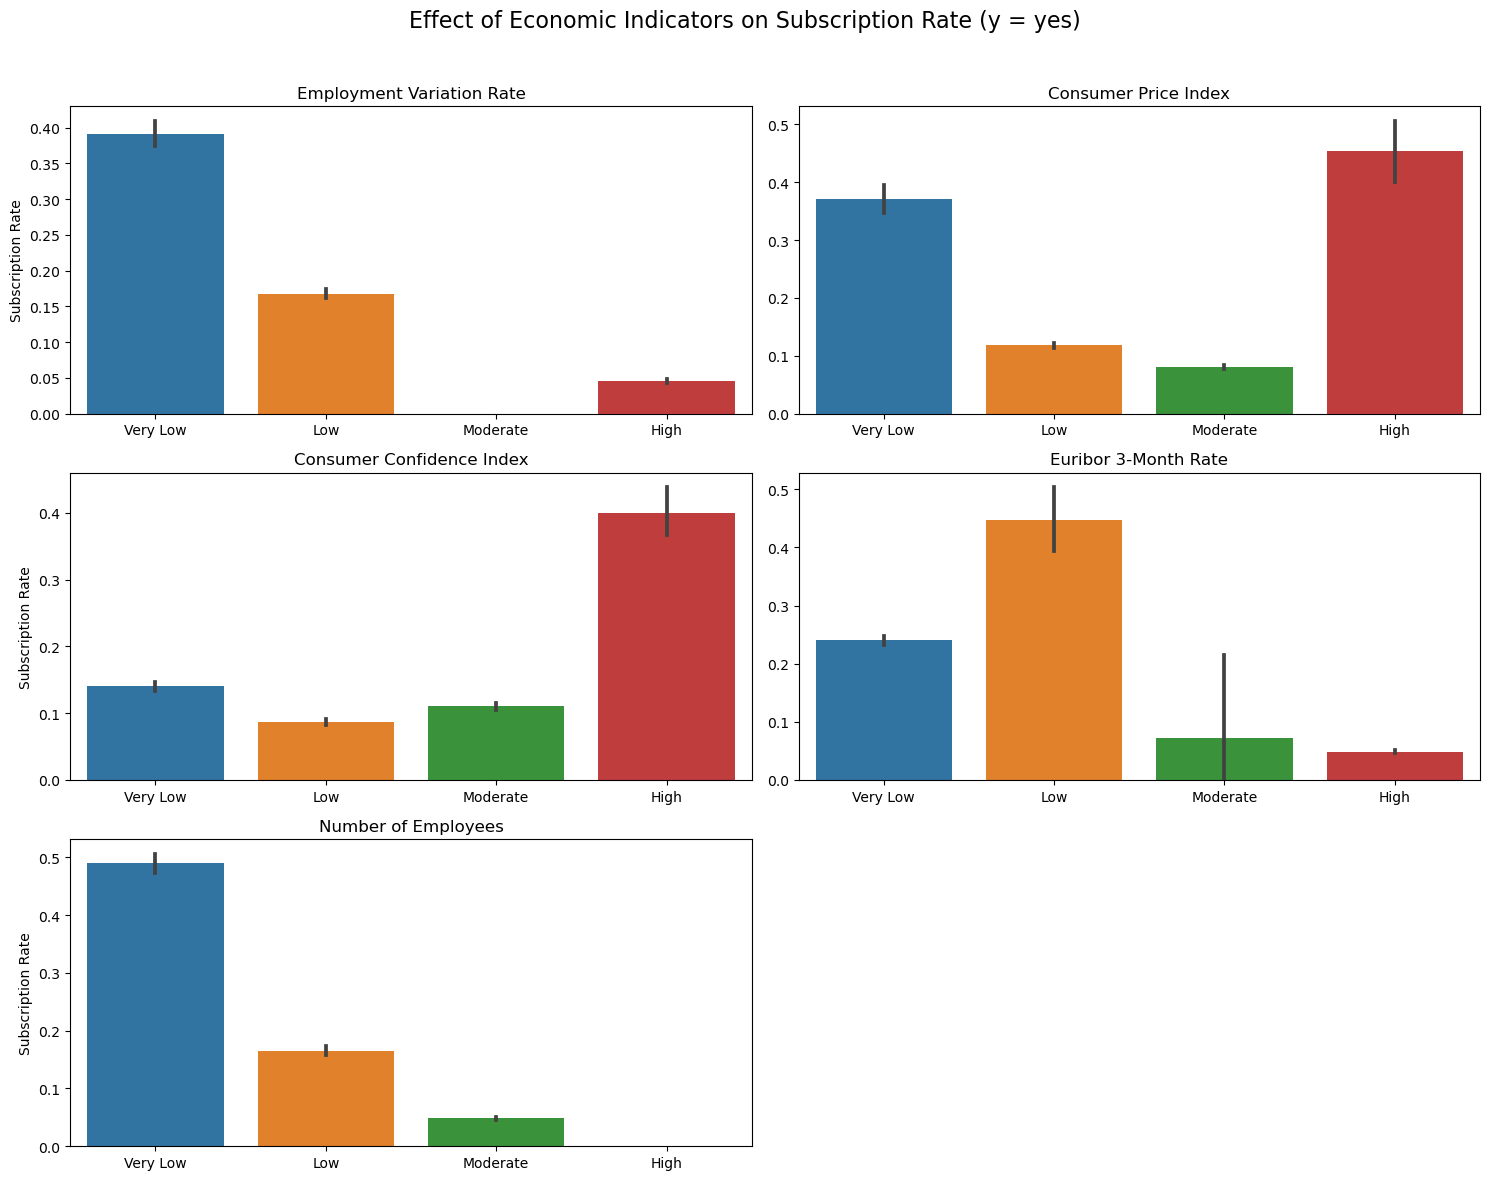

In [6]:
#Visualising the effect of Economic indicators on Subscrption rate
# Create 'subscribed' binary column
df['subscribed'] = (df['y'] == 'yes').astype(int)

# 1. Bin emp.var.rate
df['emp_rate_bin'] = pd.cut(df['emp.var.rate'], 
                            bins=[-float('inf'), -2, 0, 1, float('inf')],
                            labels=['Very Low', 'Low', 'Moderate', 'High'])

# 2. Bin cons.price.idx
df['price_idx_bin'] = pd.cut(df['cons.price.idx'], 
                             bins=[91, 92.5, 93.5, 94.5, 95],
                             labels=['Very Low', 'Low', 'Moderate', 'High'])

# 3. Bin cons.conf.idx
df['conf_idx_bin'] = pd.cut(df['cons.conf.idx'], 
                            bins=[-float('inf'), -46, -40, -30, float('inf')],
                            labels=['Very Low', 'Low', 'Moderate', 'High'])

# 4. Bin euribor3m
df['euribor_bin'] = pd.cut(df['euribor3m'], 
                           bins=[0, 1.5, 2.5, 4, float('inf')],
                           labels=['Very Low', 'Low', 'Moderate', 'High'])

# 5. Bin nr.employed
df['employed_bin'] = pd.cut(df['nr.employed'], 
                            bins=[4950, 5050, 5150, 5250, float('inf')],
                            labels=['Very Low', 'Low', 'Moderate', 'High'])

# Set up subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Effect of Economic Indicators on Subscription Rate (y = yes)', fontsize=16)

# Plot 1: emp.var.rate
sns.barplot(data=df, x='emp_rate_bin', y='subscribed', estimator='mean', ax=axes[0, 0])
axes[0, 0].set_title('Employment Variation Rate')
axes[0, 0].set_ylabel('Subscription Rate')
axes[0, 0].set_xlabel('')

# Plot 2: cons.price.idx
sns.barplot(data=df, x='price_idx_bin', y='subscribed', estimator='mean', ax=axes[0, 1])
axes[0, 1].set_title('Consumer Price Index')
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlabel('')

# Plot 3: cons.conf.idx
sns.barplot(data=df, x='conf_idx_bin', y='subscribed', estimator='mean', ax=axes[1, 0])
axes[1, 0].set_title('Consumer Confidence Index')
axes[1, 0].set_ylabel('Subscription Rate')
axes[1, 0].set_xlabel('')

# Plot 4: euribor3m
sns.barplot(data=df, x='euribor_bin', y='subscribed', estimator='mean', ax=axes[1, 1])
axes[1, 1].set_title('Euribor 3-Month Rate')
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlabel('')

# Plot 5: nr.employed
sns.barplot(data=df, x='employed_bin', y='subscribed', estimator='mean', ax=axes[2, 0])
axes[2, 0].set_title('Number of Employees')
axes[2, 0].set_ylabel('Subscription Rate')
axes[2, 0].set_xlabel('')

# Hide the unused subplot
fig.delaxes(axes[2, 1])

# Layout adjustments
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

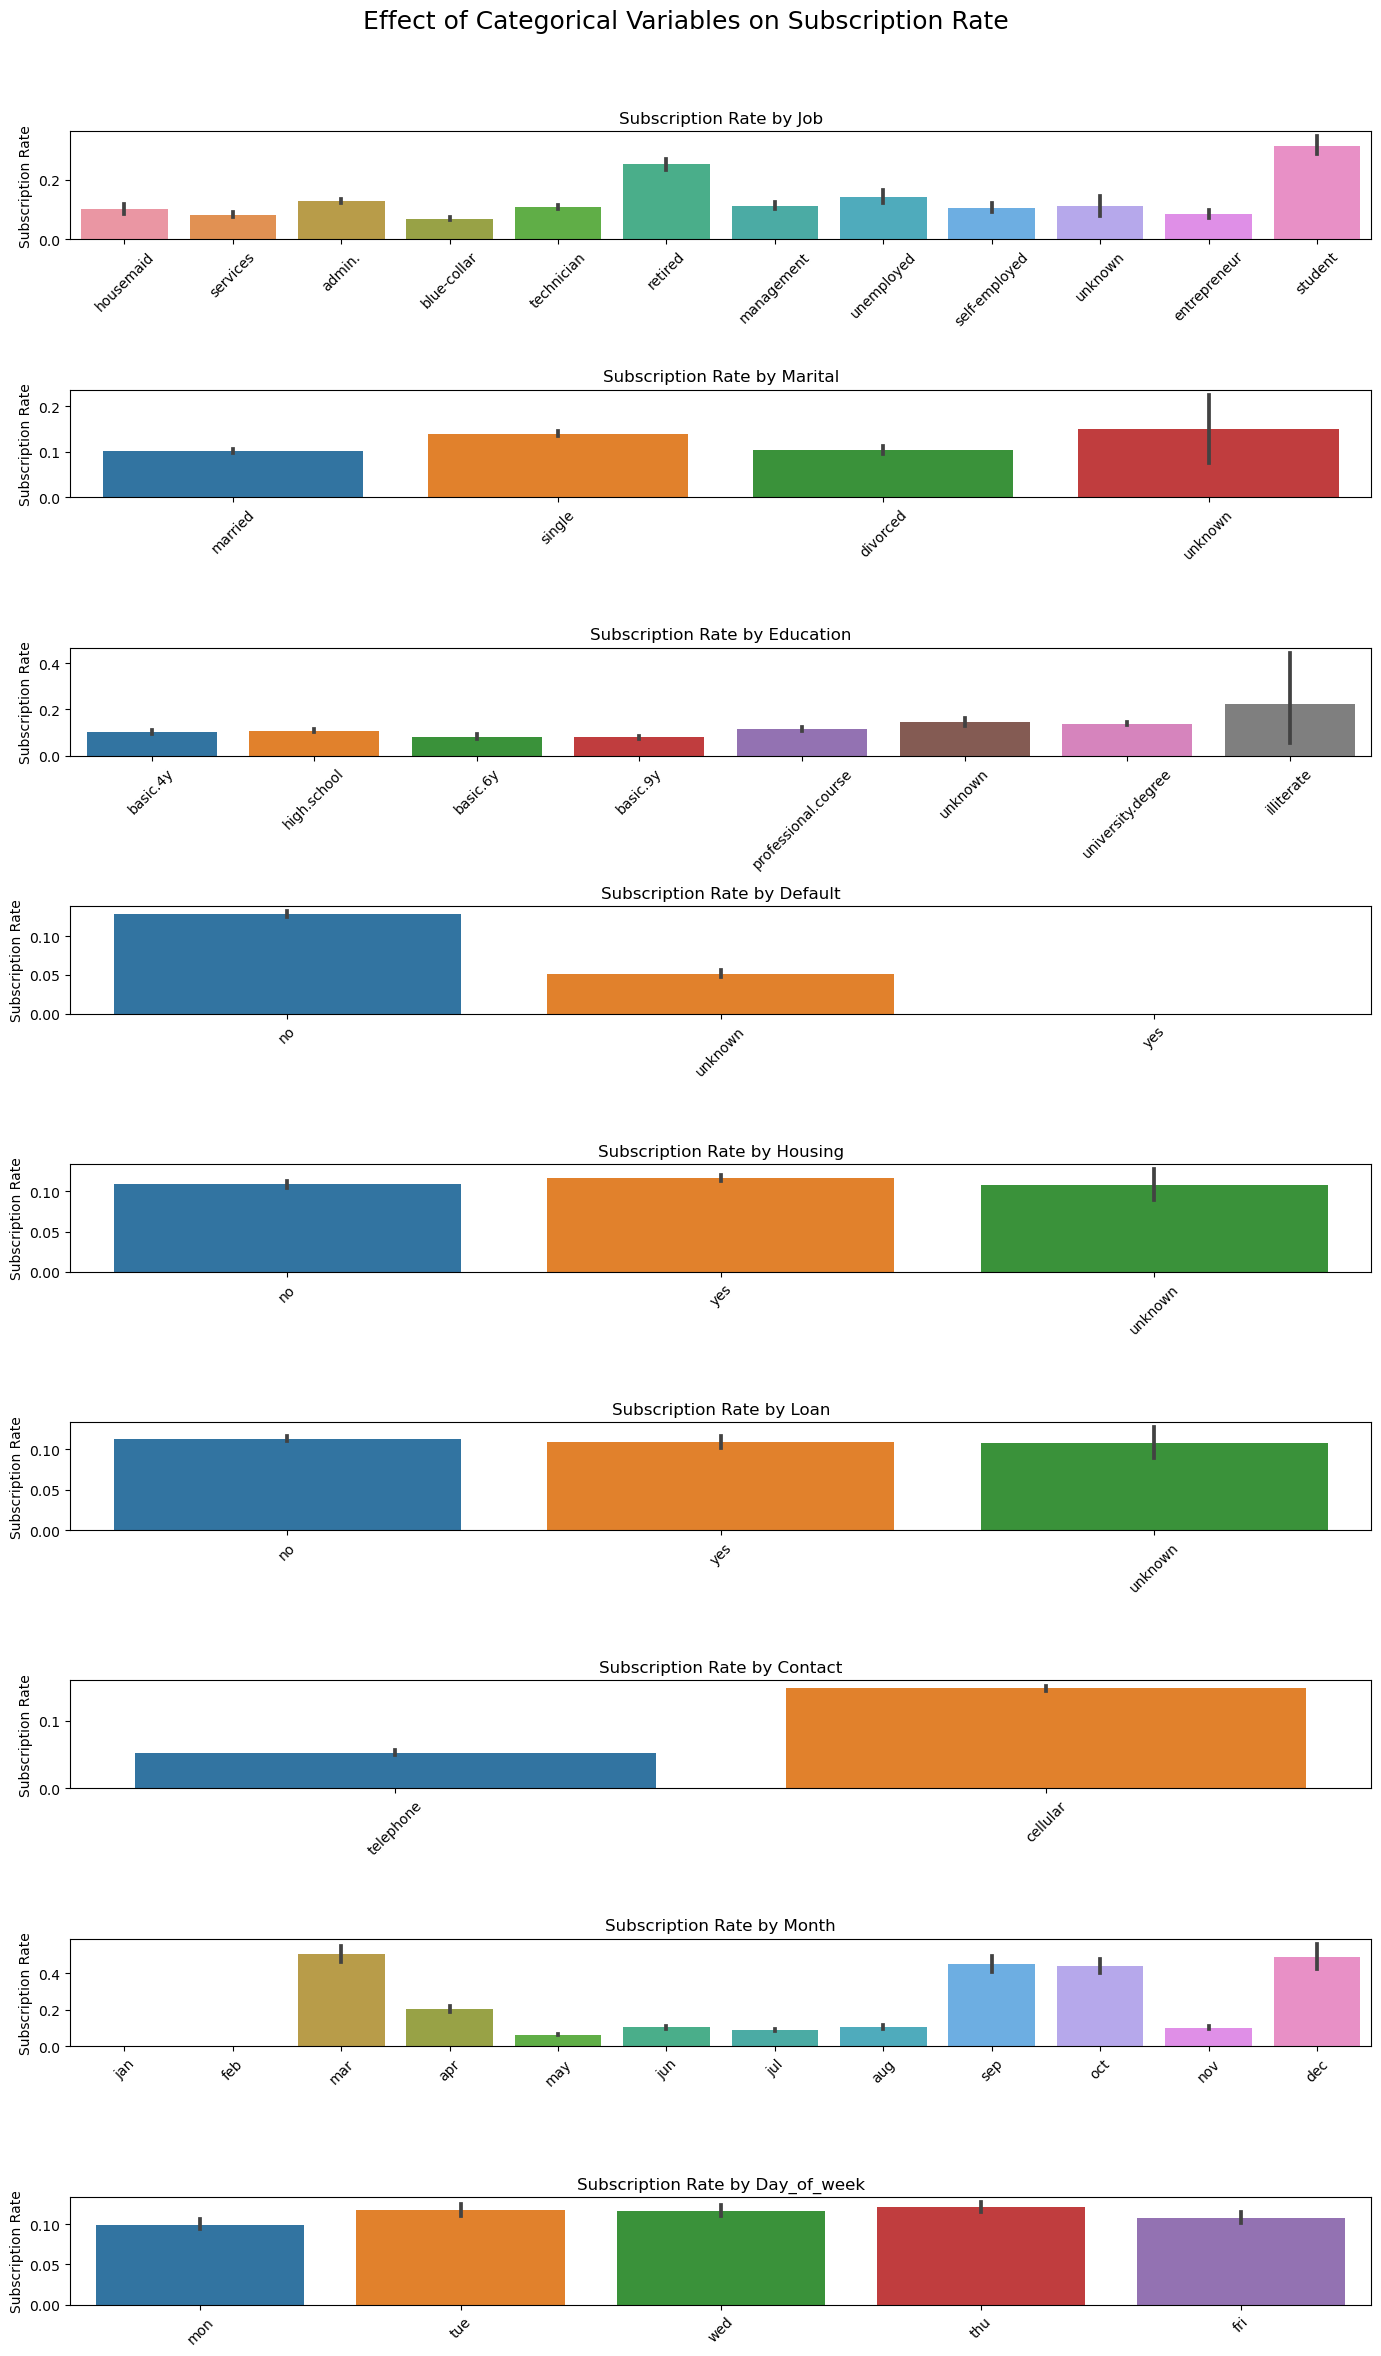

In [7]:
#Visualising the effect of the categorical variables on subscription rates
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']

fig, axes = plt.subplots(len(categorical_vars), figsize=(14, 24))
fig.suptitle('Effect of Categorical Variables on Subscription Rate', fontsize=18)

for i, var in enumerate(categorical_vars):
    order = month_order if var == 'month' else (day_order if var == 'day_of_week' else None)
    sns.barplot(data=df, x=var, y='subscribed', estimator='mean', order=order, ax=axes[i])
    axes[i].set_title(f'Subscription Rate by {var.capitalize()}')
    axes[i].set_ylabel('Subscription Rate')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [9]:
for features in numerical_features:
    # finding the first quartile
    Q1 = df[features].quantile(0.25)

    # finding the third quartile
    Q3 = df[features].quantile(0.75)

    # finding the interquartile
    IQR = Q3 - Q1

    # Finding the lower and upper limits for outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # finding where the values are too small
    lower_outliers = df[features] < lower_limit

    # finding where the values are too big
    upper_outliers = df[features] > upper_limit

    # Combine both outliers
    combined_outliers = lower_outliers | upper_outliers

    # Get the numerical rows with outliers
    outliers = df.loc[combined_outliers, numerical_features]

    # print the outliers
    print(outliers)

       age  duration  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
27713   70       187         3    999         0          -1.8          92.843   
27757   76       167         9    999         0          -1.8          92.843   
27780   73       179         1    999         1          -1.8          92.843   
27800   88        48         1    999         0          -1.8          92.843   
27802   88       266         2    999         0          -1.8          92.843   
...    ...       ...       ...    ...       ...           ...             ...   
40986   84       138         4      3         1          -1.1          94.601   
40996   81       621         1    999         2          -1.1          94.601   
41004   80       411         1    999         1          -1.1          94.601   
41183   73       334         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons_conf_idx  eurib

In [10]:
outlier_counts = {}

for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_limit) | (df[feature] > upper_limit)]
    outlier_counts[feature] = outliers.shape[0]

# Convert to DataFrame for easy viewing
outlier_summary = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Number of Outliers'])
print(outlier_summary)

          Feature  Number of Outliers
0             age                 469
1        duration                2963
2        campaign                2406
3           pdays                1515
4        previous                5625
5    emp_var_rate                   0
6  cons_price_idx                   0
7   cons_conf_idx                 447
8       euribor3m                   0
9     nr_employed                   0


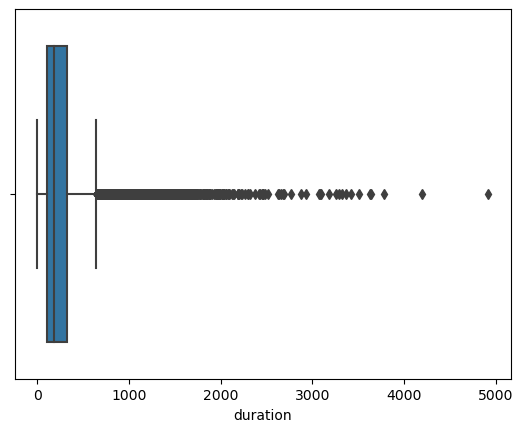

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [11]:
sns.boxplot(x=df['duration'])
plt.show()

# And check basic stats
df['duration'].describe()

In [12]:
# Compute 5th and 95th percentiles
q1 = df['duration'].quantile(0.05)
q3 = df['duration'].quantile(0.95)

# Apply Winsorization
df['duration'] = np.where(df['duration'] < q1, q1, df['duration'])
df['duration'] = np.where(df['duration'] > q3, q3, df['duration'])

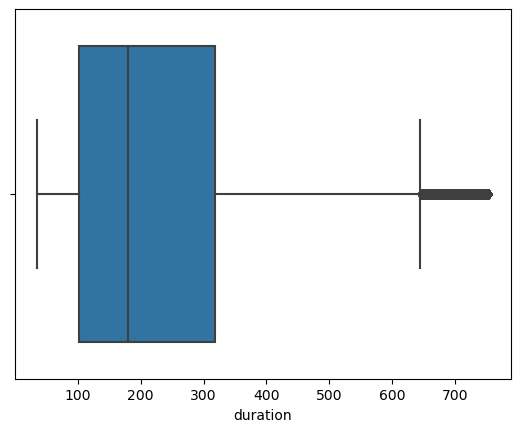

In [13]:
sns.boxplot(x=df['duration'])
plt.show()

Winsorizing successfully implemented

In [14]:
df['duration'].describe()


count    41188.000000
mean       242.313125
std        192.528409
min         36.000000
25%        102.000000
50%        180.000000
75%        319.000000
max        752.650000
Name: duration, dtype: float64

In [15]:

print(df['campaign'].describe())

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


<Axes: xlabel='campaign'>

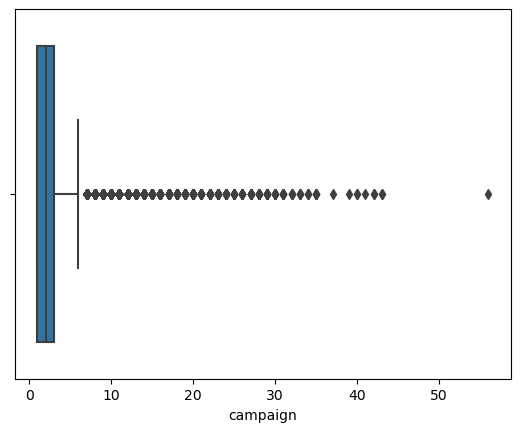

In [16]:
sns.boxplot(x=df['campaign'])

count    41188.000000
mean         2.333689
std          1.701252
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: campaign, dtype: float64


C:\Users\WIN 10 PRO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


<Axes: xlabel='campaign'>

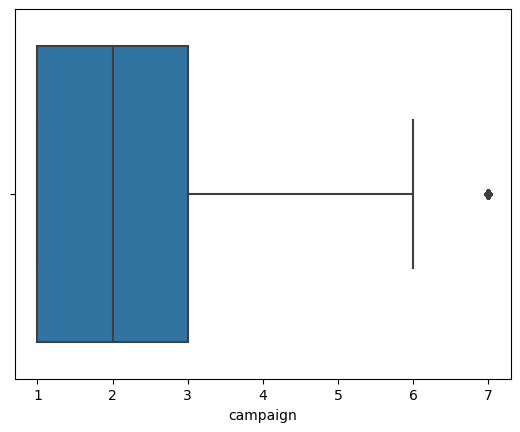

In [17]:
#Winsorizing for the campaign column: Reducing the influence of the outliers
from scipy.stats.mstats import winsorize
df['campaign'] = winsorize(df['campaign'], limits=[0.05, 0.05])

#Checking the new distribution of the campaign column
print(df['campaign'].describe())

#Visualising the new distribution
sns.boxplot(x=df['campaign'])

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64


<Axes: xlabel='pdays'>

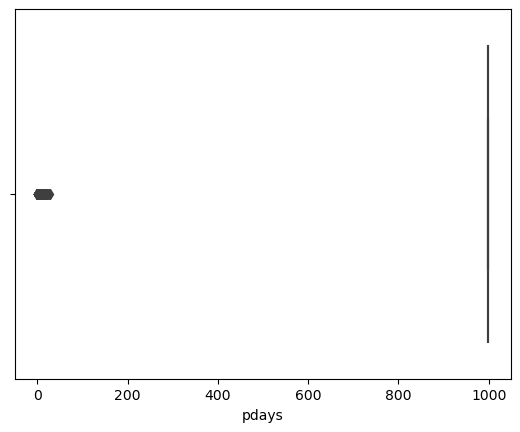

In [18]:
#Checking the distribution of pdays
print(df['pdays'].describe())

#Visualising the distribution of pdays
sns.boxplot(x=df['pdays'])

In [19]:
# Create a mask for values less than 999
mask = df['pdays'] != 999

# Apply Winsorizing to values less than 999
df.loc[mask, 'pdays'] = winsorize(df.loc[mask, 'pdays'], limits=[0.05, 0.05])

count    41188.000000
mean       962.472128
std        186.927622
min          2.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64


<Axes: xlabel='pdays'>

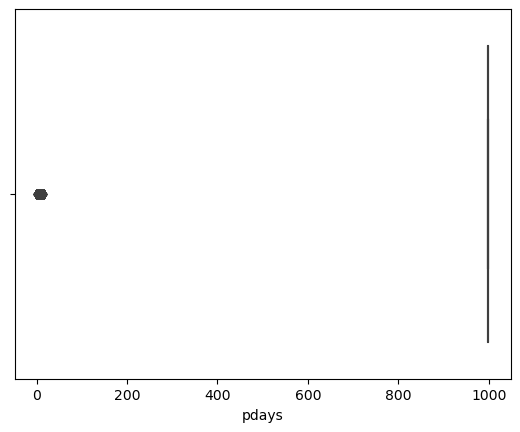

In [20]:
#Checking the new distribution
print(df['pdays'].describe())
#Visualising the new distribution of pdays
sns.boxplot(x=df['pdays'])

In [21]:
#Checking the distribution of previous
print(df['previous'].describe())


count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64


In [22]:
Q1 = df['previous'].quantile(0.25)
Q3 = df['previous'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

0.0


In [23]:
print(df['previous'].value_counts())

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64


In [24]:
#Capping all values greater than 3 to 3
df['previous'] = df['previous'].apply(lambda x: 3 if x > 3 else x)

#rechecking the distribution
print(df['previous'].describe())

count    41188.000000
mean         0.169928
std          0.472048
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: previous, dtype: float64


In [25]:
df['cons_conf_idx'].describe()

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons_conf_idx, dtype: float64

In [26]:
Q1 = df['cons_conf_idx'].quantile(0.25)
Q3 = df['cons_conf_idx'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['cons_conf_idx'] = np.where(df['cons_conf_idx'] < lower_bound, lower_bound, df['cons_conf_idx'])
df['cons_conf_idx'] = np.where(df['cons_conf_idx'] > upper_bound, upper_bound, df['cons_conf_idx'])

In [27]:
df['cons_conf_idx'].describe()

count    41188.000000
mean       -40.503143
std          4.626606
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.950000
Name: cons_conf_idx, dtype: float64

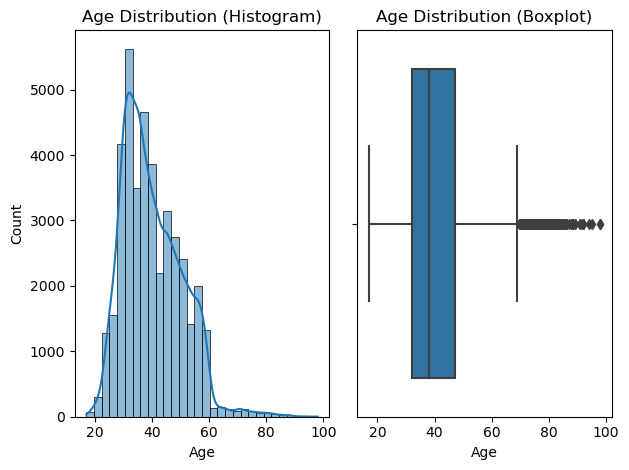

In [28]:
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution (Histogram)')
plt.xlabel('Age')
plt.ylabel('Count')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['age'])
plt.title('Age Distribution (Boxplot)')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

In [29]:
print(df['age'].describe())

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


In [30]:
from sklearn.preprocessing import StandardScaler
#Instantiating the scaler 
scaler = StandardScaler()

#fitting and transforming the numerical columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check the result
print(df[numerical_features].head())

        age  duration  campaign     pdays  previous  emp_var_rate  \
0  1.533034  0.097062 -0.783956  0.195414 -0.359985      0.648092   
1  1.628993 -0.484678 -0.783956  0.195414 -0.359985      0.648092   
2 -0.290186 -0.084732 -0.783956  0.195414 -0.359985      0.648092   
3 -0.002309 -0.474290 -0.783956  0.195414 -0.359985      0.648092   
4  1.533034  0.335990 -0.783956  0.195414 -0.359985      0.648092   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed  
0        0.722722       0.886869    0.71246      0.33168  
1        0.722722       0.886869    0.71246      0.33168  
2        0.722722       0.886869    0.71246      0.33168  
3        0.722722       0.886869    0.71246      0.33168  
4        0.722722       0.886869    0.71246      0.33168  


In [31]:
#Checking our sclaed data
print(df[numerical_features].describe())

                age      duration      campaign         pdays      previous  \
count  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04   
mean  -1.880382e-16 -1.331793e-16  6.313942e-17  2.773994e-16  3.312232e-17   
std    1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00   
min   -2.209365e+00 -1.071611e+00 -7.839555e-01 -5.138266e+00 -3.599850e-01   
25%   -7.699804e-01 -7.288006e-01 -7.839555e-01  1.954142e-01 -3.599850e-01   
50%   -1.942267e-01 -3.236607e-01 -1.961459e-01  1.954142e-01 -3.599850e-01   
75%    6.694038e-01  3.983194e-01  3.916638e-01  1.954142e-01 -3.599850e-01   
max    5.563310e+00  2.650742e+00  2.742902e+00  1.954142e-01  5.995377e+00   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m   nr_employed  
count  4.118800e+04    4.118800e+04   4.118800e+04  41188.000000  4.118800e+04  
mean   7.797546e-17   -3.315820e-14   4.209295e-16      0.000000 -1.024860e-14  
std    1.000012e+00    1.000012e+00   1.00001

In [32]:
#Defining the categorical variables
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

#Applying One-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

#Viewing categorical variables after enconding
print(df_encoded)

            age  duration  campaign     pdays  previous  emp_var_rate  \
0      1.533034  0.097062 -0.783956  0.195414 -0.359985      0.648092   
1      1.628993 -0.484678 -0.783956  0.195414 -0.359985      0.648092   
2     -0.290186 -0.084732 -0.783956  0.195414 -0.359985      0.648092   
3     -0.002309 -0.474290 -0.783956  0.195414 -0.359985      0.648092   
4      1.533034  0.335990 -0.783956  0.195414 -0.359985      0.648092   
...         ...       ...       ...       ...       ...           ...   
41183  3.164336  0.476231 -0.783956  0.195414 -0.359985     -0.752343   
41184  0.573445  0.730742 -0.783956  0.195414 -0.359985     -0.752343   
41185  1.533034 -0.276914 -0.196146  0.195414 -0.359985     -0.752343   
41186  0.381527  1.037194 -0.783956  0.195414 -0.359985     -0.752343   
41187  3.260295 -0.017209  0.391664  0.195414  1.758469     -0.752343   

       cons_price_idx  cons_conf_idx  euribor3m  nr_employed  ... month_may  \
0            0.722722       0.886869   0.712

In [34]:
#combining the nuumerical features and the encoded categorical data 
final_df = pd.concat([df[numerical_features], df_encoded.drop(columns=numerical_features)], axis=1)

#Viewing the combined features
print(final_df)

            age  duration  campaign     pdays  previous  emp_var_rate  \
0      1.533034  0.097062 -0.783956  0.195414 -0.359985      0.648092   
1      1.628993 -0.484678 -0.783956  0.195414 -0.359985      0.648092   
2     -0.290186 -0.084732 -0.783956  0.195414 -0.359985      0.648092   
3     -0.002309 -0.474290 -0.783956  0.195414 -0.359985      0.648092   
4      1.533034  0.335990 -0.783956  0.195414 -0.359985      0.648092   
...         ...       ...       ...       ...       ...           ...   
41183  3.164336  0.476231 -0.783956  0.195414 -0.359985     -0.752343   
41184  0.573445  0.730742 -0.783956  0.195414 -0.359985     -0.752343   
41185  1.533034 -0.276914 -0.196146  0.195414 -0.359985     -0.752343   
41186  0.381527  1.037194 -0.783956  0.195414 -0.359985     -0.752343   
41187  3.260295 -0.017209  0.391664  0.195414  1.758469     -0.752343   

       cons_price_idx  cons_conf_idx  euribor3m  nr_employed  ... month_may  \
0            0.722722       0.886869   0.712

In [35]:
print(final_df.head())

        age  duration  campaign     pdays  previous  emp_var_rate  \
0  1.533034  0.097062 -0.783956  0.195414 -0.359985      0.648092   
1  1.628993 -0.484678 -0.783956  0.195414 -0.359985      0.648092   
2 -0.290186 -0.084732 -0.783956  0.195414 -0.359985      0.648092   
3 -0.002309 -0.474290 -0.783956  0.195414 -0.359985      0.648092   
4  1.533034  0.335990 -0.783956  0.195414 -0.359985      0.648092   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed  ... month_may  \
0        0.722722       0.886869    0.71246      0.33168  ...      True   
1        0.722722       0.886869    0.71246      0.33168  ...      True   
2        0.722722       0.886869    0.71246      0.33168  ...      True   
3        0.722722       0.886869    0.71246      0.33168  ...      True   
4        0.722722       0.886869    0.71246      0.33168  ...      True   

   month_nov  month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0      False      False      False             True           

In [36]:
# Map yes/no to 1/0 and overwrite df['y'] itself
df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0})
final_df_copy = final_df.copy()
final_df_copy['y'] = df['y_numeric']

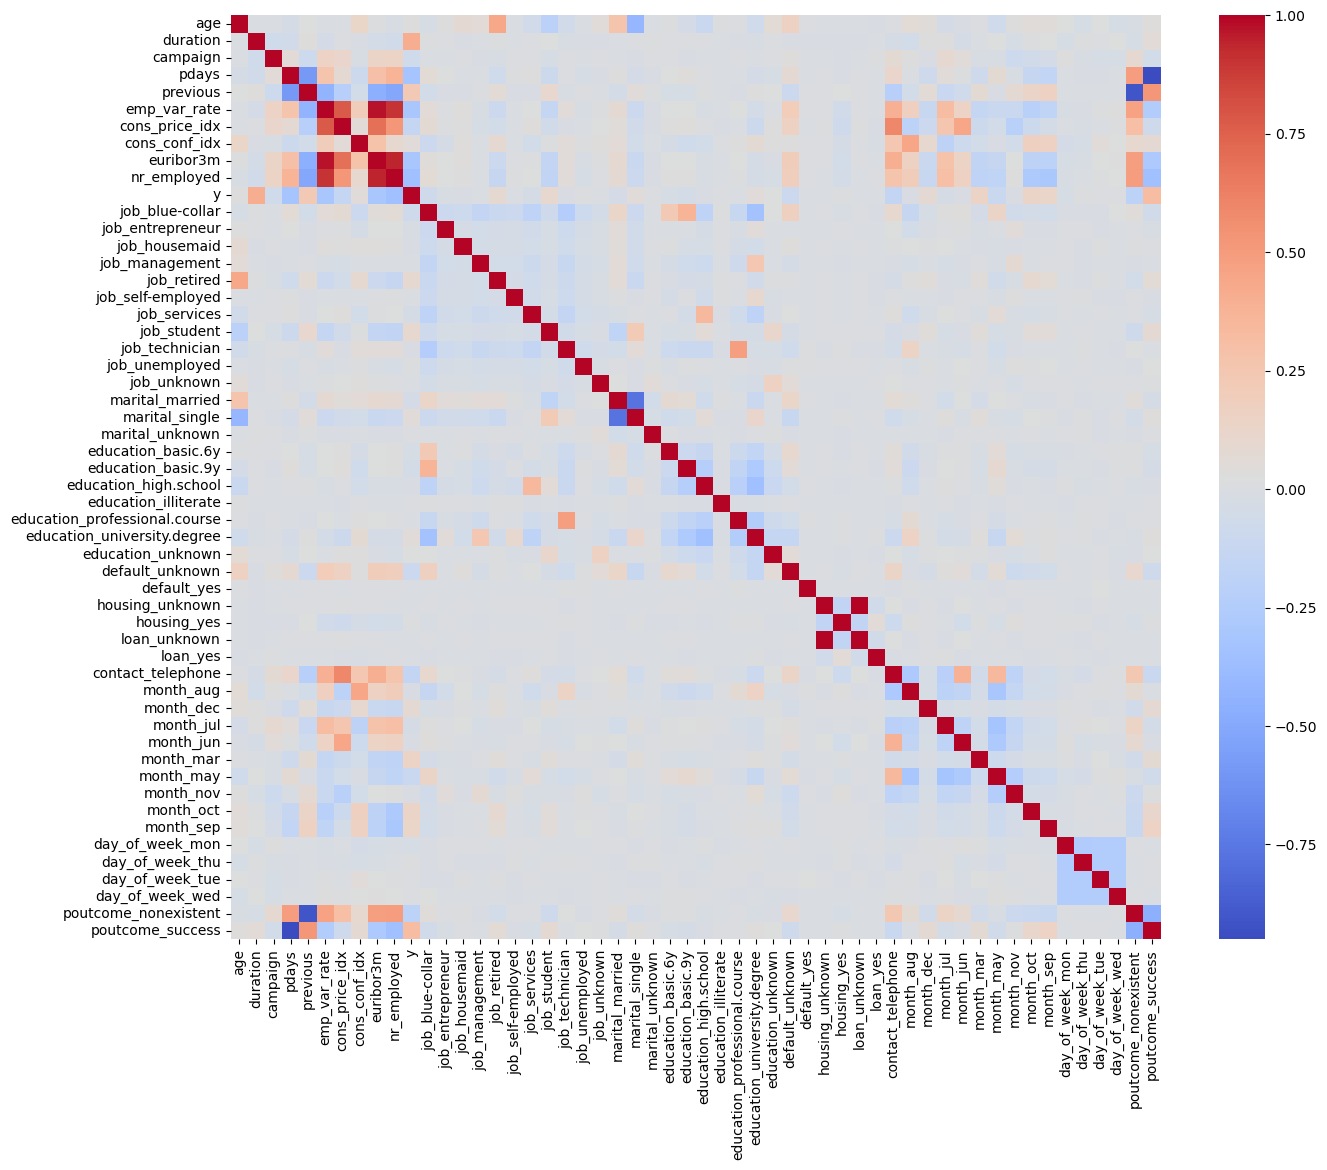

In [37]:
#Visualising the correlation between the variables
corr_matrix = final_df_copy.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

In [38]:
corr_matrix = final_df_copy.corr(numeric_only=True)
print(corr_matrix.columns) 

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutc

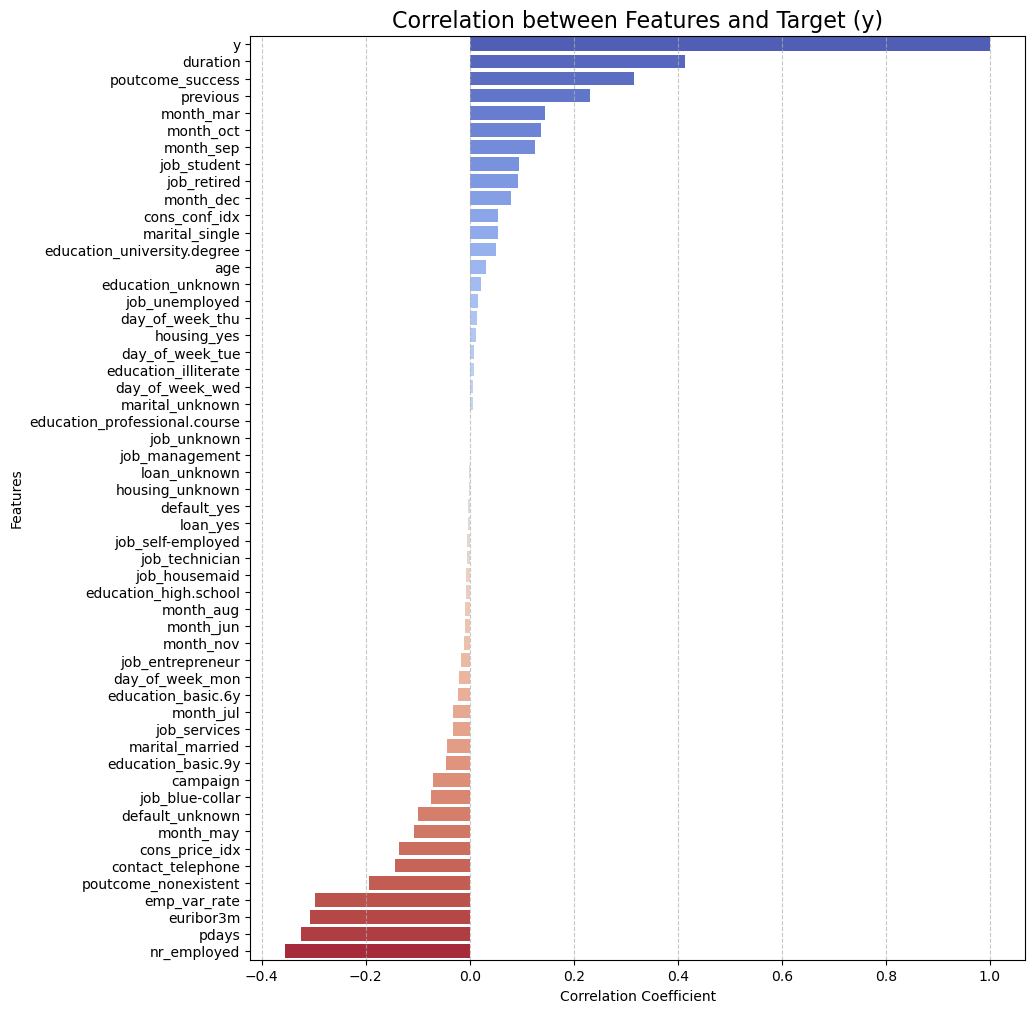

In [39]:
corr_with_target = final_df_copy.corr(numeric_only=True)['y'].sort_values(ascending=False)
# Set up the figure size
plt.figure(figsize=(10, 12))

# Create the barplot
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='coolwarm')

# Add a title and labels
plt.title('Correlation between Features and Target (y)', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Add a grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [40]:
#selected X features for model training and testing
selected_features = [
    # Negative correlation features
    'nr_employed', 'pdays', 'euribor3m', 'emp_var_rate', 'poutcome_nonexistent',
    'contact_telephone', 'cons_price_idx', 'month_may', 'default_unknown',
    'job_blue-collar', 'campaign',

    # Positive correlation features
    'poutcome_success', 'previous', 'month_mar', 'month_oct', 'month_sep',
    'job_student', 'job_retired', 'month_dec', 'cons_conf_idx', 'marital_single',
    'education_university.degree', 'age', 'education_unknown', 'job_unemployed'
]

#Defining X and Y variables for model training
X_selected = final_df[selected_features]
y_numeric = final_df['y']
y_numeric = final_df['y'].map({'yes': 1, 'no': 0})
print(X_selected.columns)

Index(['nr_employed', 'pdays', 'euribor3m', 'emp_var_rate',
       'poutcome_nonexistent', 'contact_telephone', 'cons_price_idx',
       'month_may', 'default_unknown', 'job_blue-collar', 'campaign',
       'poutcome_success', 'previous', 'month_mar', 'month_oct', 'month_sep',
       'job_student', 'job_retired', 'month_dec', 'cons_conf_idx',
       'marital_single', 'education_university.degree', 'age',
       'education_unknown', 'job_unemployed'],
      dtype='object')


In [41]:
#Importing models for taining and testing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [42]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_numeric, test_size=0.2, random_state=42, stratify=y_numeric
)

In [43]:
#Training the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9005826656955572
Precision: 0.6872852233676976
Recall: 0.21551724137931033
AUC: 0.796621155479032
Confusion Matrix:
 [[7219   91]
 [ 728  200]]


In [44]:
importance = np.abs(model.coef_[0])
for feat, imp in sorted(zip(X_selected.columns, importance), key=lambda x: x[1], reverse=True):
    print(f"{feat}: {imp}")

month_mar: 1.19855910737906
emp_var_rate: 0.9420376067287533
contact_telephone: 0.7030077904086282
poutcome_success: 0.6542733770431045
cons_price_idx: 0.6296649791747045
month_may: 0.48413680029706974
month_dec: 0.4338612803354089
poutcome_nonexistent: 0.41868090009299047
job_retired: 0.3769852692347393
euribor3m: 0.2773611140987873
default_unknown: 0.24289008853774935
pdays: 0.222154880753948
job_student: 0.19743821390808255
cons_conf_idx: 0.1871600985164764
education_unknown: 0.11741783512508475
nr_employed: 0.11110392897012583
job_blue-collar: 0.10391157956929722
education_university.degree: 0.10245807119269505
month_oct: 0.10200298540499256
marital_single: 0.08400513174510457
campaign: 0.08355474663099371
previous: 0.03742282714876149
job_unemployed: 0.02390764354267514
month_sep: 0.006131172669924214
age: 0.005379442177474662


In [45]:
#Dropped features due to model over-reliance and others little to no effect
features_to_drop = ['poutcome_success', 'month_mar', 'emp_var_rate', 'poutcome_nonexistent', "contact_telephone", "cons_price_idx", "pdays", "month_sep", 'marital_single',
    'education_university.degree', 'age', 'education_unknown', 'job_unemployed']


#Newly developed X_feature
X_reduced = X_selected.drop(columns=features_to_drop)

In [46]:
#Splitting the new data
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y_numeric, test_size=0.2, random_state=42, stratify=y_numeric
)

In [47]:
#Training a new logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8922068463219228
Precision: 0.5769230769230769
Recall: 0.16163793103448276
AUC: 0.7838362806028587
Confusion Matrix:
 [[7200  110]
 [ 778  150]]


In [49]:
#Using RandomForests 
from sklearn.ensemble import RandomForestClassifier

In [50]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))
print("Recall:", recall_score(y_test, y_pred, pos_label=1))
print("AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8868657441126487
Precision: 0.49607843137254903
Recall: 0.27262931034482757
AUC: 0.7519726018915986
Confusion Matrix:
 [[7053  257]
 [ 675  253]]


In [52]:
#Introducing Synthetic Minority Over-sampling Technique(SMOTE) to improve the Random Forest Model due to high imbalance of y
import sklearn
import imblearn
from imblearn.over_sampling import SMOTE
print(sklearn.__version__)
print(imblearn.__version__)

1.3.0
0.12.2


In [53]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y_numeric)

In [54]:
#Splitting my resampled data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42)

In [55]:
# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Train model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
import joblib

# Save compressed Random Forest model
joblib.dump(rf_model, 'model.pkl', compress=3)

['model.pkl']

In [57]:
X_train.shape

(51167, 25)

In [58]:
X_train.columns.tolist()

['nr_employed',
 'pdays',
 'euribor3m',
 'emp_var_rate',
 'poutcome_nonexistent',
 'contact_telephone',
 'cons_price_idx',
 'month_may',
 'default_unknown',
 'job_blue-collar',
 'campaign',
 'poutcome_success',
 'previous',
 'month_mar',
 'month_oct',
 'month_sep',
 'job_student',
 'job_retired',
 'month_dec',
 'cons_conf_idx',
 'marital_single',
 'education_university.degree',
 'age',
 'education_unknown',
 'job_unemployed']

In [56]:
y_pred = rf_model.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[10034   971]
 [  998  9926]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     11005
           1       0.91      0.91      0.91     10924

    accuracy                           0.91     21929
   macro avg       0.91      0.91      0.91     21929
weighted avg       0.91      0.91      0.91     21929


Accuracy Score:
0.9102102239044189


In [62]:
#Ordering the important features
feature_importances = pd.Series(rf_model.feature_importances_, index=X_selected.columns)

# Sort values in descending order
feature_importances_sorted = feature_importances.sort_values(ascending=False)

print(feature_importances_sorted)

euribor3m                      0.324653
age                            0.222451
campaign                       0.105000
emp_var_rate                   0.067953
nr_employed                    0.059064
cons_conf_idx                  0.032208
cons_price_idx                 0.023350
pdays                          0.019268
education_university.degree    0.016146
marital_single                 0.016075
default_unknown                0.013847
contact_telephone              0.013208
previous                       0.012788
poutcome_success               0.012785
job_blue-collar                0.012271
month_may                      0.009402
poutcome_nonexistent           0.007794
education_unknown              0.006695
job_retired                    0.006666
month_oct                      0.005385
job_unemployed                 0.004839
job_student                    0.004521
month_mar                      0.002781
month_sep                      0.000607
month_dec                      0.000242


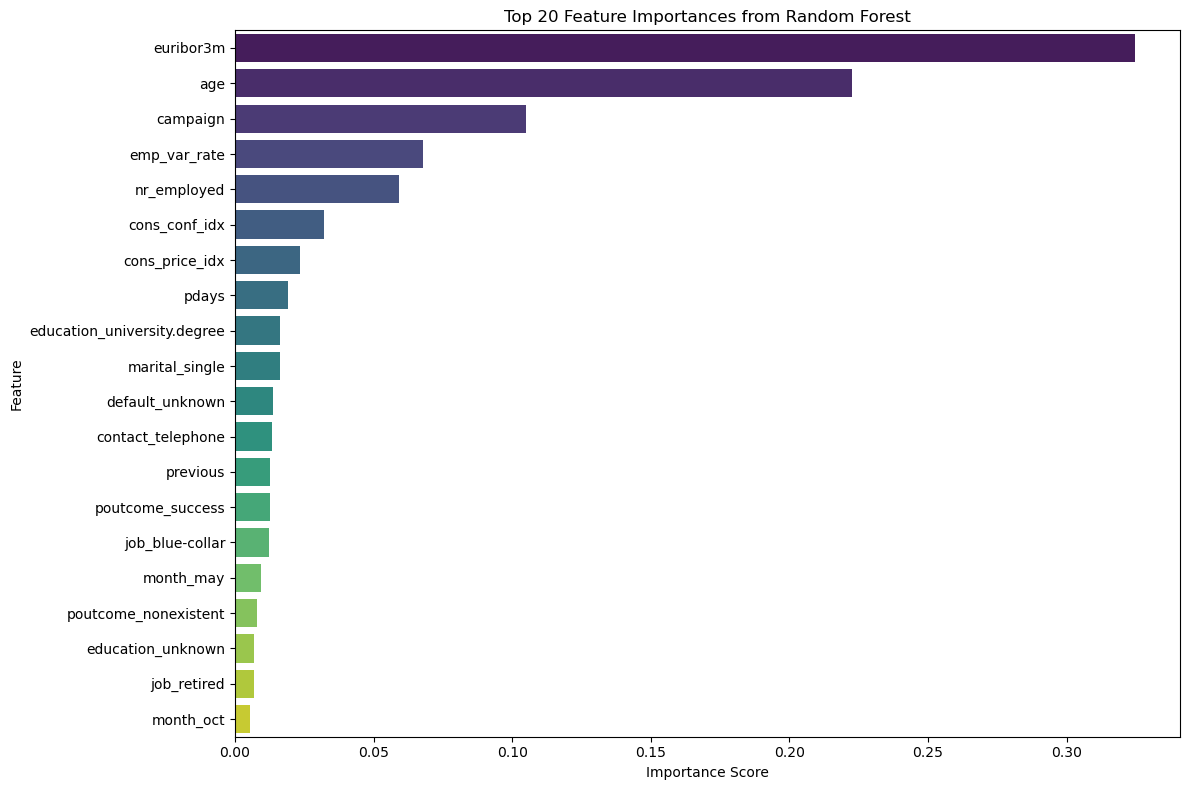

In [63]:
# Plot the top 20 important features
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances_sorted.head(20), y=feature_importances_sorted.head(20).index, palette="viridis")
plt.title('Top 20 Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

After developing the initial Logistic Regression model using the available features, I sought to understand which variables significantly influenced the model’s predictive performance and which variables contributed little or potentially introduced noise into the predictions.

To achieve this, I conducted a feature importance analysis by examining the model coefficients. Based on the analysis, several features appeared to either have low predictive power or added unnecessary complexity to the model. The following features were identified for removal: 'poutcome_success' 'month_mar' 'emp_var_rate' 'poutcome_nonexistent' 'contact_telephone' 'cons_price_idx' 'pdays' 'month_sep' 'marital_single' 'education_university.degree' 'age' 'education_unknown' 'job_unemployed'.

I then re-trained and tested the Logistic Regression model using this reduced set of features. The goal was to determine whether eliminating these variables would enhance the model's generalization. While this led to marginal improvements in some performance metrics, the overall results remained unsatisfactory particularly in handling class imbalance, which had already been identified during the Exploratory Data Analysis (EDA) phase. The EDA revealed that the dataset was highly imbalanced, with a disproportionate number of negative (no subscription) versus positive (subscription) outcomes.

Recognizing that Logistic Regression might struggle with imbalanced data, I decided to test a Random Forest Classifier using the original feature set as a benchmark comparison. Although this approach demonstrated some improvement in performance metrics compared to the Logistic Regression models (both full and reduced feature sets), the issue of class imbalance persisted, limiting the model’s ability to accurately predict the minority class.

To directly address this imbalance, I implemented the Synthetic Minority Over-sampling Technique (SMOTE).  After applying SMOTE to the data while maintaining the original selected feature set I re-trained the Random Forest model.

The post-resampling evaluation demonstrated substantial improvements across all performance metrics: Increased accuracy, Improved precision and recall for the minority class, Higher AUC scores, indicating better discriminative ability. A more balanced confusion matrix, with significantly reduced false negatives and false positives. This progression confirmed that addressing class imbalance had a profound effect on model performance and validated the decision to incorporate resampling techniques alongside model selection and feature optimization.